# Reading raw simulation files
### Simulations do not have to be fully stitched into an h5 file before reading and visualzing their data

In [1]:
from mayawaves.utils.postprocessingutils import get_stitched_data
import matplotlib.pyplot as plt
import numpy as np

In [2]:
simulation_directory = "../example_simulation/D11_q5_a1_-0.362_-0.0548_-0.64_a2_-0.0013_0.001_-0.0838_m533.33"

## Use get_stitched_data to stitch together any output file structured as columns of data with each row being a time/iteration step

In [3]:
shifttracker0_data = get_stitched_data(simulation_directory, 'ShiftTracker0.asc')
shifttracker1_data = get_stitched_data(simulation_directory, 'ShiftTracker1.asc')

Stitching 17 files
Stitching 17 files


### You can then plot the data based on the columns present in the data file. In the following, columns 2 and 3 (starting at 0) of the shift tracker files contain the x and y components of the positions.

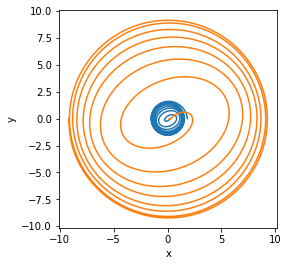

In [4]:
plt.plot(shifttracker0_data[:,2], shifttracker0_data[:,3])
plt.plot(shifttracker1_data[:,2], shifttracker1_data[:,3])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
separation_vector = shifttracker1_data[:,2:5] - shifttracker0_data[:,2:5]
separation_mag = np.linalg.norm(separation_vector, axis=1)

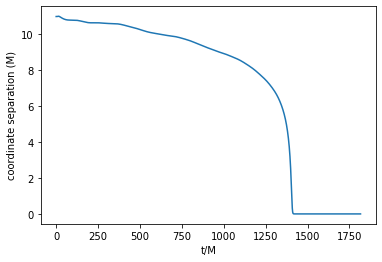

In [6]:
plt.plot(shifttracker0_data[:,1], separation_mag)
plt.xlabel('t/M')
plt.ylabel('coordinate separation (M)')
plt.show()

## Plot the real componenet of the $\Psi_4$ data using columns 0 and 1 of the Ylm_WEYLSCAL4 files
### Note that the initial ~(75 + extraction_radius) M will be junk radiation and should be cut off for most analyses. That time is marked in the following tutorial with a vertical dashed line.

In [7]:
psi4_data = get_stitched_data(simulation_directory, 'Ylm_WEYLSCAL4::Psi4r_l2_m2_r75.00.asc')

Stitching 17 files


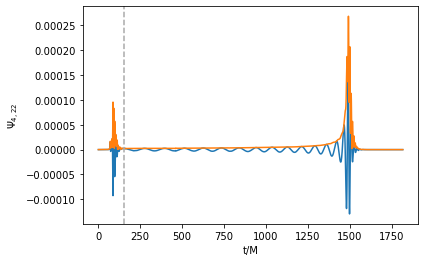

In [8]:
plt.plot(psi4_data[:,0], psi4_data[:,1])
plt.plot(psi4_data[:,0], np.sqrt(psi4_data[:,1]*psi4_data[:,1] + psi4_data[:,2]*psi4_data[:,2]))
plt.axvline(x=150, c='#a9a9a9', linestyle='--')
plt.xlabel('t/M')
plt.ylabel(r'$\Psi_{4, 22}$')
plt.show()